## Problem Statement:
### To develop a predictive framework for enabling proactive retention strategy for a telecom company.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore')

# Importing the Data for ML Project

In [2]:
tele=pd.read_excel('TelcoChurn.xlsx')

In [3]:
tele.shape

(7043, 21)

In [4]:
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
tele.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
tele=tele.drop(['customerID'], axis=1)

# Label the Churn feature to 1/0

In [9]:
tele['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
tele['churn']=tele['Churn'].map({'Yes':1,'No':0})

In [11]:
#df['target']=np.where(df['Churn']=="Yes",1,0)
tele['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [12]:
tele.shape

(7043, 21)

# Drop the Churn feature to retain only Target 

In [13]:
tele=tele.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [14]:
# Y=df[['target']]
# X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [15]:
tele['churn'].value_counts()/len(tele['churn'])

0    0.73463
1    0.26537
Name: churn, dtype: float64

<AxesSubplot:>

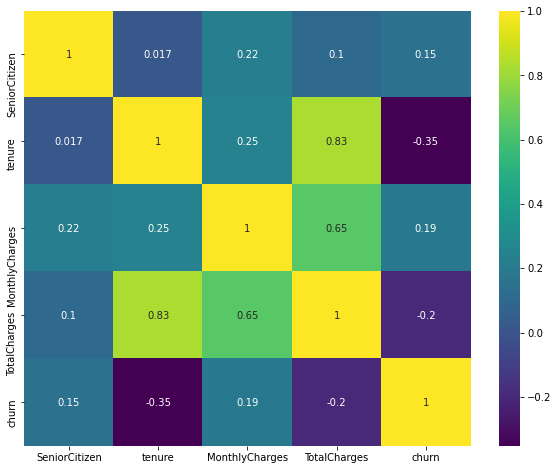

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(tele.corr(), annot = True, cmap = 'viridis')

From the above heat map we can infer that churn is positively correlated to the monthly charges and negatively correlated to the total charges and tenure. 


# Split features into Numerical and Categorical


In [17]:
tele.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churn'],
      dtype='object')

### Taking only the categorical variables

In [18]:

tele_char=tele.drop(['MonthlyCharges', 'TotalCharges','SeniorCitizen', 'tenure'], axis=1, inplace=False)


In [19]:
tele_char.shape

(7043, 16)

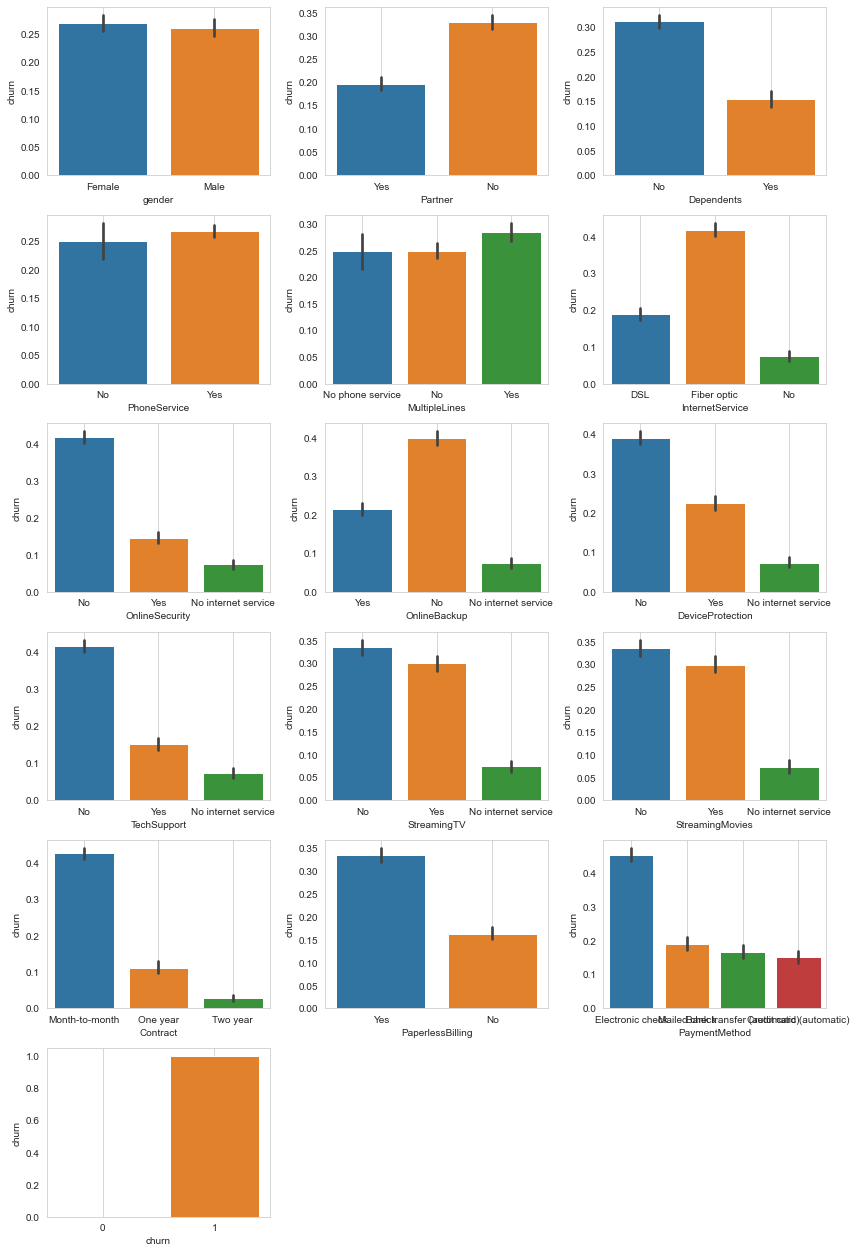

In [20]:
plt.figure(figsize=(12,20))
sns.set_style("whitegrid")
 
for i, col in enumerate(list(tele_char.columns.values)):
  plt.subplot(7,3,i+1)
  sns.barplot(y=tele_char.churn, x=tele_char[col], data=tele_char)
  plt.grid()
  plt.tight_layout()

### Some of the findings are:
 1. Less churn rate with the customer's partner, however churn rate increases with the number of dependents.
 2. The customers with the phone service have a high churn rate and also with he customers with multiple lines and fiber optic internet service.
 3. The customers with no online backup, no online security and no device protection, for these customers the churn rate is high.
 4. The customers with no streaming TV, no Tech support and no streaming movies, for them the churn rate is high.
 5. Less churn rate for customers who have one year or two year contract with the telecom companny compared to customers with month to month contract.


### Taking the numerical features now

In [21]:
tele_num=tele[['MonthlyCharges', 'TotalCharges','SeniorCitizen', 'tenure']]
##df = df._get_numeric_data() #drop non-numeric cols, another approach


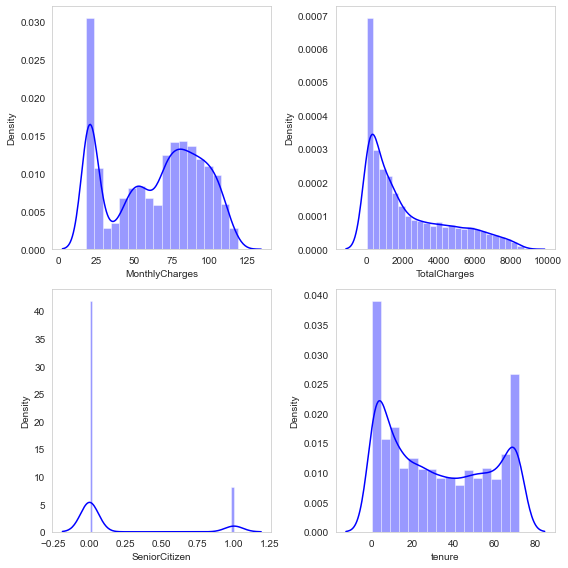

In [22]:
plt.figure(figsize=(8,8))
for i,col in enumerate(list(tele_num.columns.values)):
    plt.subplot(2,2,i+1)
    sns.distplot(tele_num[col], kde=True, color='b')
    plt.grid()
    plt.tight_layout()


### From the plots we can conclude:
1. The customers have stayed maximum for around 5 months or 75 months with the current service provider.
2. Low monthly and total charges are in big numbers.

In [23]:
tele_num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [24]:
tele_num=tele_num.drop(['SeniorCitizen'], axis=1)

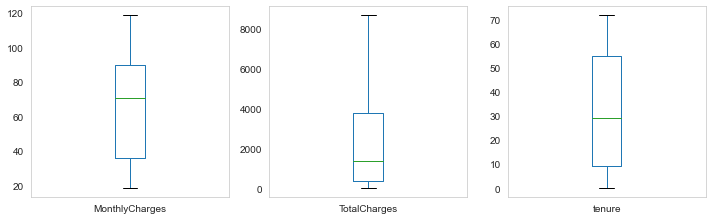

In [25]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(tele_num.columns.values)):
  plt.subplot(4,3,i+1)
  tele_num.boxplot(col)
  plt.grid()
  plt.tight_layout()

### Variance Inflation Factor (VIF)

In [26]:
#calculate VIF for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(tele_num.values, i) for i in range(tele_num.shape[1])]
vif['variable'] = tele_num.columns

#view VIF for each explanatory variable 
vif.sort_values(by='VIF', ascending=False)


,VIF,variable
1,8.075651,TotalCharges
2,6.332253,tenure
0,3.355907,MonthlyCharges


The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. 
If the VIF is between 5-10, multicolinearity is likely present and we should consider dropping the variable. As expected, 
the total charges and the tenure have a high variance inflation factor 
because they "explain" the same variance within this dataset. We would need to
discard one of these variables before moving on to model building or risk building a model with high multicolinearity. But I will
keep both the features and later see what impact these have on the model if I include them.

In [27]:
tele_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.798992,32.371149
std,30.090047,2266.730170,24.559481
min,18.250000,18.800000,0.000000
1%,19.200000,19.871000,1.000000
5%,19.650000,49.070000,1.000000
10%,20.050000,83.470000,2.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000


In [28]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.90))
    return(x)
tele_num=tele_num.apply(lambda x : outlier_cap(x))

In [29]:
tele_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.209094,2175.963951,32.153344
std,29.259887,2046.834123,24.215127
min,19.650000,49.070000,1.000000
1%,19.650000,49.070000,1.000000
5%,19.650000,49.088000,1.000000
10%,20.050000,83.470000,2.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000


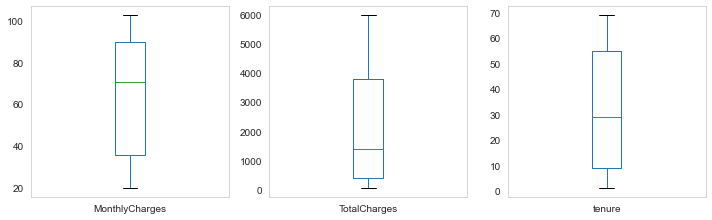

In [30]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(tele_num.columns.values)):
  plt.subplot(4,3,i+1)
  tele_num.boxplot(col)
  plt.grid()
  plt.tight_layout()

In [31]:
tele_num.columns
tele_char.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'churn'],
      dtype='object')

### Converting categorical values into dummy variables

In [32]:
tele_char_dum = pd.get_dummies(tele_char, drop_first = True)

In [33]:
pd.set_option('display.max_columns',None)
tele_char_dum.head()

,churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [34]:
tele=pd.concat([tele_num, tele_char_dum],axis=1, join="inner")

In [35]:
tele.head()

,MonthlyCharges,TotalCharges,tenure,churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,49.07,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,56.95,1889.50,34,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,53.85,108.15,2,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,42.30,1840.75,45,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,70.70,151.65,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tele.drop('churn',axis=1))
scaled_features

array([[-1.17435632, -1.03918776, -1.28661539, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.24810791, -0.13996459,  0.07626585, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.35406253, -1.01032162, -1.24531596, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-1.18290105, -0.89388965, -0.87362108, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.34831404, -0.91336013, -1.1627171 , ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 1.31215925,  1.8555464 ,  1.39784767, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [37]:
#tele_feat=pd.DataFrame(scaled_features,columns=tele.columns[:-1])
tele_feat=pd.DataFrame(scaled_features,columns=tele.columns.drop(['churn']))
tele_feat.head()

,MonthlyCharges,TotalCharges,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.174356,-1.039188,-1.286615,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.248108,-0.139965,0.076266,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.354063,-1.010322,-1.245316,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.748829,-0.163784,0.530560,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,0.221852,-0.989068,-1.245316,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


In [38]:
###Logistic regression
from sklearn.model_selection import train_test_split

In [39]:
X=tele_feat # X contains the scaled features.
y=tele['churn']
print(X.shape)
print(y.shape)


(7043, 29)
(7043,)


In [40]:
X.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4695, 29)
(4695,)
(2348, 29)
(2348,)


In [43]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred=log_reg.predict(X_test)


In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix  

array([[1515,  167],
       [ 299,  367]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1682
           1       0.69      0.55      0.61       666

    accuracy                           0.80      2348
   macro avg       0.76      0.73      0.74      2348
weighted avg       0.79      0.80      0.79      2348



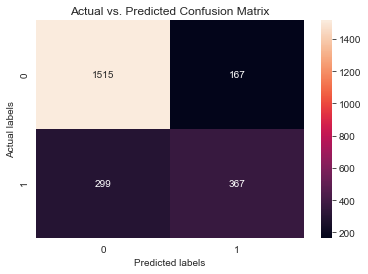

In [47]:
ax= plt.subplot()
sns.heatmap(conf_matrix ,annot=True, ax= ax, fmt='')

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);

plt.show()

In [ ]:
(TP/(TP+FN))=367/(367+299)

In [122]:
367/(367+299)

0.551051051051051

In [48]:
coeff_df=pd.DataFrame(tele.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(log_reg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,MonthlyCharges,-0.612089
1,TotalCharges,0.543003
2,tenure,-1.331854
3,churn,-0.010855
4,gender_Male,-0.007036
5,Partner_Yes,-0.091341
6,Dependents_Yes,-0.020336
7,PhoneService_Yes,0.020336
8,MultipleLines_No phone service,0.198506
9,MultipleLines_Yes,0.622344


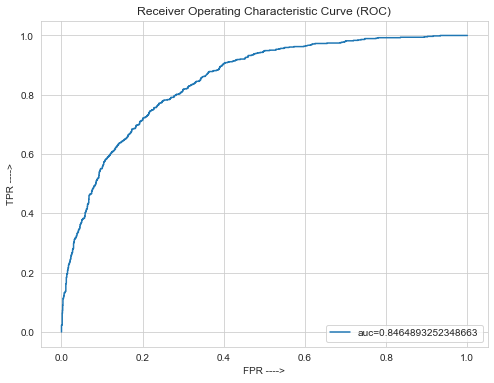

In [49]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
X=tele.drop(['churn'], axis=1)
y=tele['churn']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [53]:
model=DecisionTreeClassifier(random_state=32,max_depth=5)

In [54]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

#Predict the output variable value for the X test dataset

y_pred=dt.predict(X_test)

In [55]:
y_pred_proba = dt.predict_proba(X_test)[::,1]

In [56]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[1565,  117],
       [ 401,  265]], dtype=int64)

<AxesSubplot:>

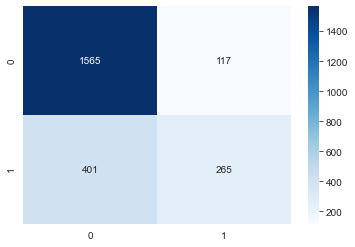

In [57]:
sns.heatmap(conf_matrix, annot = True, cmap="Blues", fmt='')

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1682
           1       0.69      0.40      0.51       666

    accuracy                           0.78      2348
   macro avg       0.74      0.66      0.68      2348
weighted avg       0.77      0.78      0.76      2348



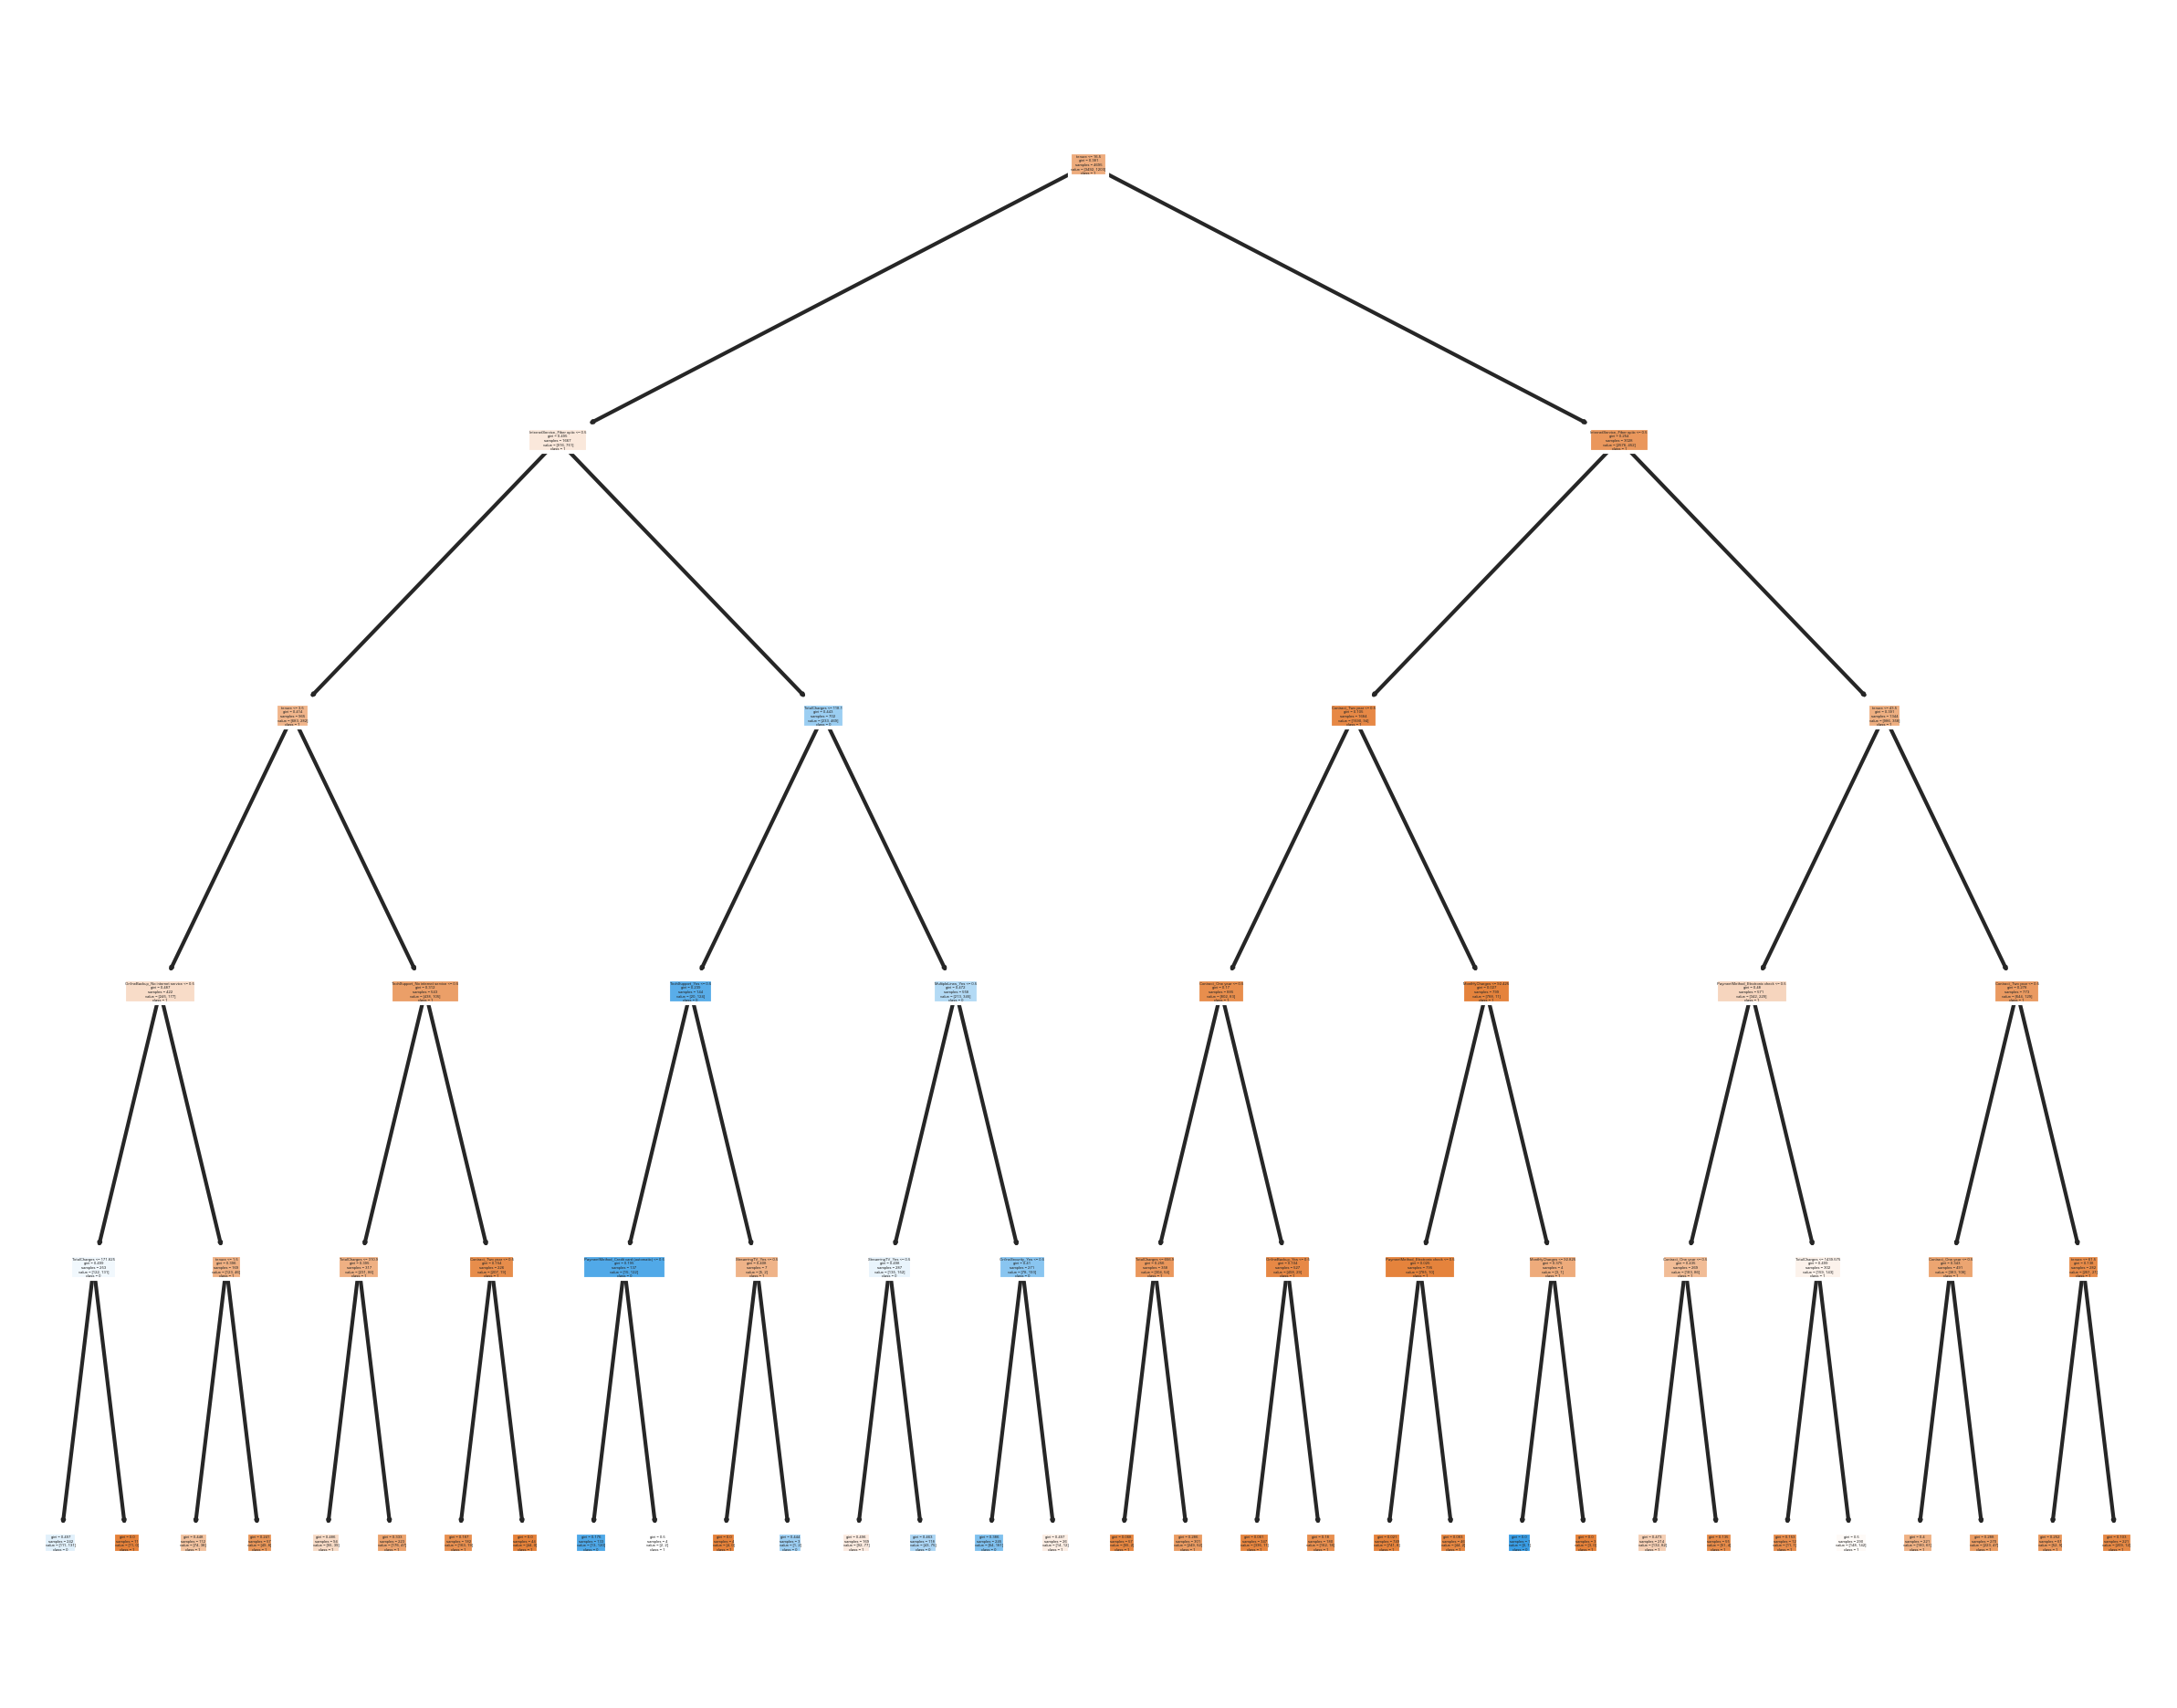

In [59]:
from sklearn import tree
df1=pd.DataFrame(tele.drop(['churn'],axis=1))
column_names=list(df1.columns)
fn=column_names
cn=['1','0']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)

tree.plot_tree(model,
           feature_names = fn, 
           class_names=cn,
           filled = True);

fig.savefig('DecisionTree.png')

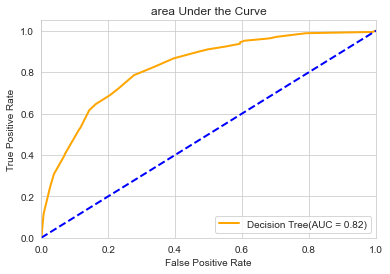

In [60]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
plt.legend(loc="upper left")
plt.legend(loc="lower right")




In [61]:
#retry with max depth 6
model=DecisionTreeClassifier(random_state=42,max_depth=4)    #constraint

In [62]:
# fit the DecisionTreeClassifeir model on the train dataset

dt=model.fit(X_train,y_train)

#Predict the output variable value for the X test dataset

y_pred=dt.predict(X_test)

In [63]:
#Evaluation of the model
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[1513,  169],
       [ 333,  333]], dtype=int64)

<AxesSubplot:>

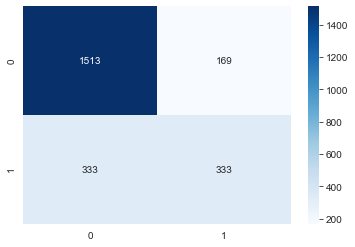

In [64]:
labels = ['Not Churned', 'Churned']

sns.heatmap(conf_matrix, annot = True, cmap="Blues", fmt='')
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix');



In [65]:
# classification: recall, precision, F1 score , Accuracy 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1682
           1       0.66      0.50      0.57       666

    accuracy                           0.79      2348
   macro avg       0.74      0.70      0.71      2348
weighted avg       0.78      0.79      0.78      2348



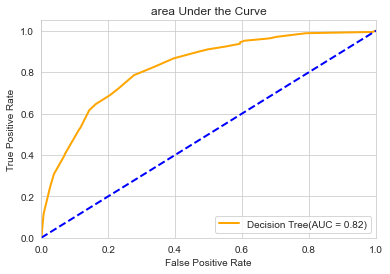

In [66]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Decision Tree(AUC = %0.2f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Random forest

In [67]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [68]:
X=tele.drop(['churn'], axis=1)
y=tele['churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [69]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [70]:
from sklearn.model_selection import GridSearchCV
#Providing random seed so that the same result is obtained everytime
np.random.seed(42)

# Providing the different values of hyperparameters
param_dist = {'max_depth': [3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy'],
             'n_estimators': [100, 200, 300, 500, 1000]}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1)
#n_jobs=3,-1
#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X_train,y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'n_estimators': 1000}


In [71]:
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 6,
                  n_estimators=1000)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=1000,
                       random_state=42)

In [72]:
# Working on the OOB rate, OOB rate by default is 'FALSE'

fit_rf.set_params(oob_score=True)

min_estimators = 500
max_estimators = 2000

error_rate = {}

for i in range(min_estimators, max_estimators + 1,5):
    fit_rf.set_params(n_estimators=i)       #specifying the number of extimators or DTs
    fit_rf.fit(X_train,y_train)     #fit to the train dataset

    oob_error = 1 - fit_rf.oob_score_      #oob_score_ gives prediction score, subtract from 1 to find error
    error_rate[i] = oob_error

In [73]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

500     0.198935
505     0.198083
510     0.198083
515     0.198296
520     0.198509
          ...   
1980    0.199148
1985    0.199148
1990    0.199148
1995    0.199148
2000    0.199148
Length: 301, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

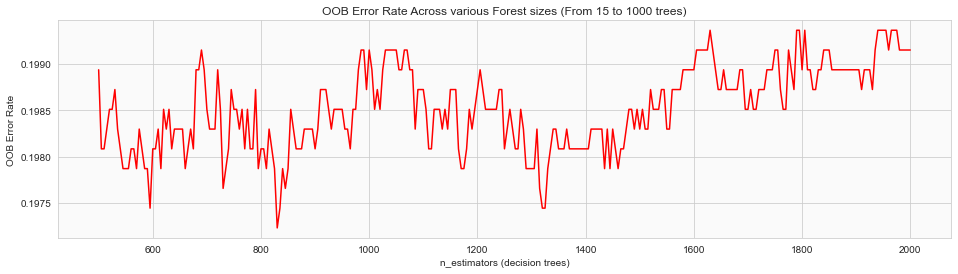

In [74]:
fig, ax = plt.subplots(figsize=(16, 4))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
#plt.axhline(0.042, color='#875FDB',linestyle='--')
#plt.axhline(0.037, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1000 trees)')

In [75]:
print('OOB Error rate for 1380 trees is: {0:.5f}'.format(oob_series[1380]))

OOB Error rate for 1380 trees is: 0.19808


In [76]:
fit_rf.set_params(n_estimators=1380,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=1380,
                       random_state=42)

In [77]:
fit_rf.fit(X_train, y_train)
pred_rf = fit_rf.predict(X_test)
y_pred_proba = fit_rf.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

In [78]:
confusion_matrix(y_test,pred_rf)

array([[1541,  141],
       [ 358,  308]], dtype=int64)

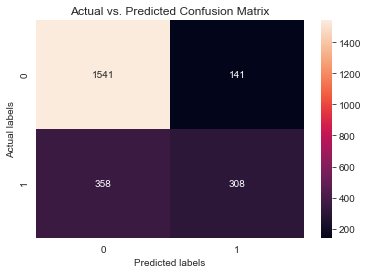

In [79]:
cm=confusion_matrix(y_test,pred_rf)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax, fmt='')
labels = ['Not Churned', 'Churned']
ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);

plt.show()

In [80]:
# classification: recall, precision, F1 score , Accuracy 
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1682
           1       0.69      0.46      0.55       666

    accuracy                           0.79      2348
   macro avg       0.75      0.69      0.71      2348
weighted avg       0.78      0.79      0.77      2348



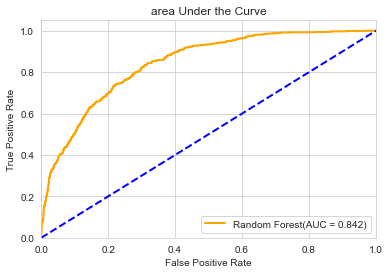

In [81]:
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")


In [82]:
rf_best = cv_rf.best_estimator_
rf_best

RandomForestClassifier(max_depth=6, max_features=None, n_estimators=1000,
                       random_state=42)

In [83]:
rf_best.feature_importances_

array([0.08494926, 0.08995004, 0.38720754, 0.00603514, 0.00412781,
       0.00736351, 0.00475686, 0.00497959, 0.01251458, 0.25112718,
       0.00341713, 0.00252609, 0.0112046 , 0.0025066 , 0.00476914,
       0.00238462, 0.00166302, 0.00259722, 0.01191063, 0.00260652,
       0.00371882, 0.00254587, 0.00390722, 0.02158877, 0.02017042,
       0.01374998, 0.00327601, 0.02759854, 0.00484727])

In [84]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})
imp_df
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,tenure,0.387208
9,InternetService_Fiber optic,0.251127
1,TotalCharges,0.089950
0,MonthlyCharges,0.084949
27,PaymentMethod_Electronic check,0.027599
23,Contract_One year,0.021589
24,Contract_Two year,0.020170
25,PaperlessBilling_Yes,0.013750
8,MultipleLines_Yes,0.012515
18,TechSupport_Yes,0.011911


### Random Forest Classifier model is finetuned by using cross validation which makes use of the hyperparameters.

In [85]:
import time
start = time.time()
classifier = RandomForestClassifier(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 6,
                  n_estimators=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cv = ShuffleSplit(n_splits=10, test_size=0.2)
scores = cross_val_score(classifier, X, y, cv=10)
print(classification_report(y_test, y_pred))
print("Random Forest accuracy after 10 fold CV: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2) + ", " + str(round(time.time() - start, 3)) + "s")

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1682
           1       0.69      0.46      0.55       666

    accuracy                           0.79      2348
   macro avg       0.75      0.69      0.71      2348
weighted avg       0.78      0.79      0.77      2348

Random Forest accuracy after 10 fold CV: 0.80 (+/- 0.03), 96.869s


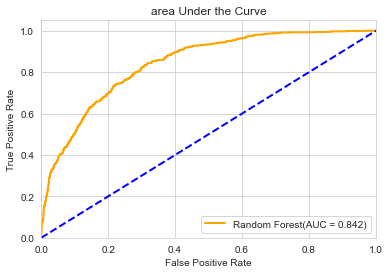

In [86]:
y_pred_prob = classifier.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   
from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='Random Forest(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## KNN algorithm

In [87]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

In [88]:
#KNN model is distance based, hence scaling of features is very important. X is a dataframe that contains all the features 
#which are scaled and y contains target variable
X=tele_feat # X contains the scaled features.
y=tele['churn']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)    #Instantiate
knn.fit(X_train,y_train)                     #make sure to scale the independent variables , then split the dataset. and then 
                                                #fit onto x_train scaled
pred = knn.predict(X_test)   

In [91]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1405  277]
 [ 318  348]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1682
           1       0.56      0.52      0.54       666

    accuracy                           0.75      2348
   macro avg       0.69      0.68      0.68      2348
weighted avg       0.74      0.75      0.74      2348



In [92]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):    # May take some time
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,tele_feat,tele['churn'],cv=10)
    accuracy_rate.append(score.mean())
    
#For different number of neighbors the model is run several times using FOR loop
# cross_val_score returns the accuracy score of all the 10 validations done since cv = 10
# In the Accuracy list the mean of all 10 scores is stored.

#Hence we have the mean accuracy score for each iteration.

Text(0, 0.5, 'Accuracy Rate')

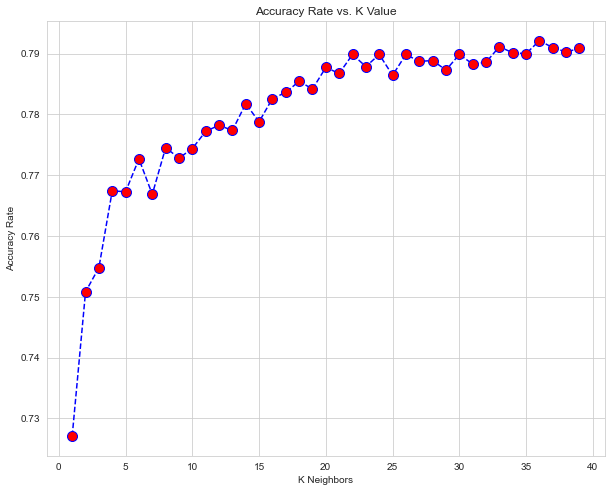

In [93]:
#Plotting the mean accuracy socre against all the K values

plt.figure(figsize = (10,8))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Rate')

In [94]:
#Finally using the optimum value of K = 28

knn = KNeighborsClassifier(n_neighbors=30)    #Instantiate
knn.fit(X_train,y_train)                     #fit
pred = knn.predict(X_test)                   #Predict

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1481  201]
 [ 309  357]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1682
           1       0.64      0.54      0.58       666

    accuracy                           0.78      2348
   macro avg       0.73      0.71      0.72      2348
weighted avg       0.77      0.78      0.78      2348



In [95]:
y_pred_proba = knn.predict_proba(X_test)[::,1] 

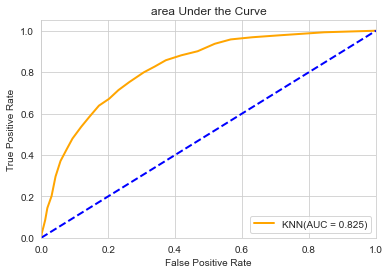

In [96]:
#Finally finding the AUROC Curve

from sklearn.metrics import roc_curve, auc
#Plotting the AUROC curve

plt.figure(1)
lw=2
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba)
roc_auc_dt = auc(fpr_dt,tpr_dt)
plt.plot(fpr_dt,tpr_dt,color='orange',lw=lw,label='KNN(AUC = %0.3f)'%roc_auc_dt)
plt.plot([0,1],[0,1],color='blue',lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("area Under the Curve")
# plt.legend(loc="upper left")
plt.legend(loc="lower right")

## Naive Bayes

In [97]:
##naive bayes
from sklearn.naive_bayes import GaussianNB

In [98]:
X=tele.drop(['churn'], axis=1)
y=tele['churn']

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [100]:
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

In [101]:
# Predict Output 
pred = model.predict(X_test)
mat = confusion_matrix(y_test, pred)       #Multiclass Confusion Matrix
print(mat)

[[982 700]
 [ 79 587]]


[]

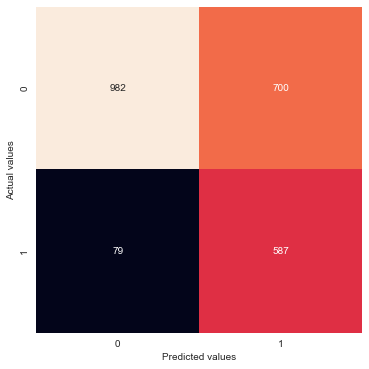

In [102]:
# Plot Confusion Matrix
plt.figure(figsize=(8,6))
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.plot()

In [103]:
# Printing the precision and recall, among other metrics
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1900
           1       0.46      0.69      0.55       448

    accuracy                           0.79      2348
   macro avg       0.69      0.75      0.71      2348
weighted avg       0.83      0.79      0.80      2348



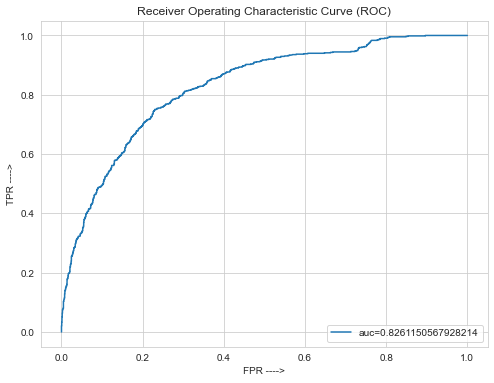

In [104]:
from sklearn import metrics

y_pred_proba =model.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]   

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

## SVM

In [105]:
##SVM
X=tele_feat # X contains the scaled features.
y=tele['churn']

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [107]:
from sklearn.svm import SVC     #support Vector Classifier
from sklearn import metrics    #default kernel is rbf
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7900340715502555


In [108]:
##linear model
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred_lin = svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_lin))

Accuracy Score:
0.7925894378194208


In [109]:
#Optimized Parameter from GridSearchCv

In [110]:
# from sklearn.model_selection import GridSearchCV
# np.random.seed(42)

# tuned_parameter = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['linear','rbf','poly']}

# model_svm = GridSearchCV(svc,tuned_parameter,cv=10,scoring='accuracy')

In [111]:
# model_svm.fit(X_train,y_train)


# #Printing the best parameters by using best_params
# print('Best Parameters using grid search: \n', model_svm.best_params_)


In [112]:
#print(model_svm.best_score_)

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1682
           1       0.71      0.45      0.55       666

    accuracy                           0.79      2348
   macro avg       0.76      0.69      0.71      2348
weighted avg       0.78      0.79      0.78      2348

Linear SVM accuracy after 10 fold CV: 0.799 (+/- 0.02), 9.262s
[0.79574468 0.80992908 0.7929078  0.82528409 0.77556818 0.79119318
 0.79829545 0.80397727 0.796875   0.79829545]
0.7988070196647324
[[1558  124]
 [ 365  301]]


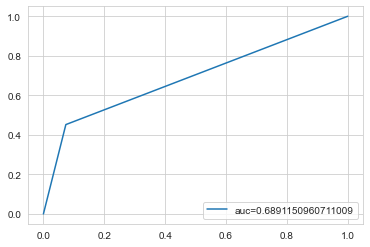

In [113]:
from sklearn.metrics import roc_auc_score
start = time.time()
classifier = SVC(kernel = 'poly')
classifier.fit(X_train, y_train)
y_pred_poly = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y, cv=10)
print(classification_report(y_test, y_pred_poly))
print("Linear SVM accuracy after 10 fold CV: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2) + ", " + str(round(time.time() - start, 3)) + "s")

print(scores)
print(scores.mean())

cnf_matrix = confusion_matrix(y_test,y_pred_poly)
print(cnf_matrix)

fpr, tpr, _ = roc_curve(y_test,  y_pred_poly)
auc = roc_auc_score(y_test, y_pred_poly)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1682
           1       0.67      0.52      0.59       666

    accuracy                           0.79      2348
   macro avg       0.75      0.71      0.72      2348
weighted avg       0.78      0.79      0.78      2348

Linear SVM accuracy after 10 fold CV: 0.793 (+/- 0.02), 13.582s
[0.79432624 0.80283688 0.79432624 0.81960227 0.78551136 0.77130682
 0.796875   0.78977273 0.78835227 0.79119318]
0.7934102998065764
[[1513  169]
 [ 318  348]]


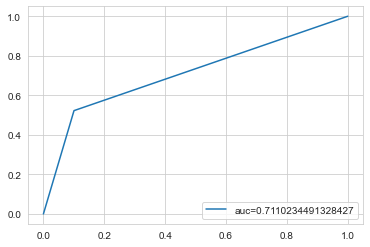

In [114]:
start = time.time()
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)
y_pred_linear = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y, cv=10)
print(classification_report(y_test, y_pred_linear))
print("Linear SVM accuracy after 10 fold CV: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2) + ", " + str(round(time.time() - start, 3)) + "s")

print(scores)
print(scores.mean())
cnf_matrix = confusion_matrix(y_test,y_pred_linear)
print(cnf_matrix)

fpr, tpr, _ = roc_curve(y_test,  y_pred_linear)
auc = roc_auc_score(y_test, y_pred_linear)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1682
           1       0.68      0.48      0.57       666

    accuracy                           0.79      2348
   macro avg       0.75      0.70      0.71      2348
weighted avg       0.78      0.79      0.78      2348

Linear SVM accuracy after 10 fold CV: 0.799 (+/- 0.02), 26.037s
[0.8        0.8070922  0.79432624 0.82102273 0.78125    0.78835227
 0.80397727 0.79829545 0.80113636 0.79829545]
0.7993747985170858
[[1533  149]
 [ 344  322]]


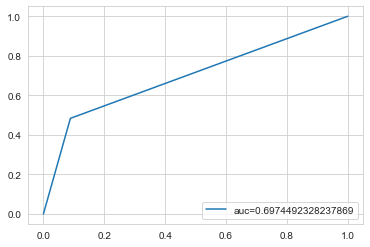

In [115]:
# start = time.time()
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)
y_pred_rbf = classifier.predict(X_test)
scores = cross_val_score(classifier, X, y, cv=10)
print(classification_report(y_test, y_pred_rbf))
print("Linear SVM accuracy after 10 fold CV: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2) + ", " + str(round(time.time() - start, 3)) + "s")

print(scores)
print(scores.mean())
cnf_matrix = confusion_matrix(y_test,y_pred_rbf)
print(cnf_matrix)

fpr, tpr, _ = roc_curve(y_test,  y_pred_rbf)
auc = roc_auc_score(y_test, y_pred_rbf)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [116]:
####comparing the models
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#import Random forest classifier and fit the data
from sklearn.ensemble import RandomForestClassifier 

# logistic regression
model1 = LogisticRegression()
#Decision tree
model2=DecisionTreeClassifier(random_state=42,max_depth=4)  #constraint
#Random forest
model3 = RandomForestClassifier(random_state=42)
##knn
model4 = KNeighborsClassifier(n_neighbors=30)
##naive bayes
model5 = GaussianNB()
##SVM
model6=SVC(kernel = 'linear')


# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
model6.fit(X_train,y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)[::,1]
pred_prob2 = model2.predict_proba(X_test)[::,1]
pred_prob3 = model3.predict_proba(X_test)[::,1]
pred_prob4 = model4.predict_proba(X_test)[::,1]
pred_prob5 = model5.predict_proba(X_test)[::,1]
pred_prob6 = model6.predict(X_test)

In [117]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6, pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1)
auc_score2 = roc_auc_score(y_test, pred_prob2)
auc_score3 = roc_auc_score(y_test, pred_prob3)
auc_score4 = roc_auc_score(y_test, pred_prob4)
auc_score5 = roc_auc_score(y_test, pred_prob5)
auc_score6 = roc_auc_score(y_test, pred_prob6)

print('AUC score for Logistic Regression is:' , auc_score1)
print('AUC score for Decision tree is:' , auc_score2)
print('AUC score for Random Forest is:' , auc_score3) 
print('AUC score for KNN is:' , auc_score4) 
print('AUC score for Naive Bayes is:' , auc_score5)
print('AUC score for SVM is:' , auc_score6)
# acc_score1 = roc_auc_score(y_test, pred_prob1)
# acc_score2 = roc_auc_score(y_test, pred_prob2)
# acc_score3 = roc_auc_score(y_test, pred_prob3)
# acc_score4 = roc_auc_score(y_test, pred_prob4)
# print("Accuracy for Logistic Regression is:", acc_score1)
# print("Accuracy for Decision Tree is:", acc_score2)
# print("Accuracy for Random Forest is:", acc_score3)
# print("Accuracy For KNN is:", acc_score4)


AUC score for Logistic Regression is: 0.8464893252348663
AUC score for Decision tree is: 0.8246523872267035
AUC score for Random Forest is: 0.8226907049737013
AUC score for KNN is: 0.8245653501301539
AUC score for Naive Bayes is: 0.8260552466854488
AUC score for SVM is: 0.7110234491328427


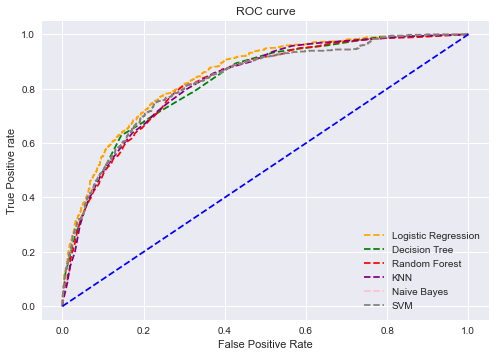

In [121]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='pink', label='Naive Bayes')
plt.plot(fpr5, tpr5, linestyle='--',color='grey', label='SVM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

After testing several models, it is found that a logistic regression model has the highest AUC using all of the features.